In [328]:
import sys
sys.path.append("../code/")
from common import APPLIANCES_ORDER
import tflearn
import tensorflow as tf



In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [330]:
tensor = np.load('../1H-input.npy')

In [331]:
def create_subset_dataset(tensor):
    t_subset = tensor[:, :, 180:194, :]
    all_indices = np.array(list(range(320)))
    for i in range(1, 7):
        valid_homes = pd.DataFrame(t_subset[:, i, :].reshape(320, 14*24)).dropna().index
        all_indices = np.intersect1d(all_indices, valid_homes)
    t_subset = t_subset[all_indices, :, :, :].reshape(52, 7, 14*24)
    
    # Create artificial aggregate
    t_subset[:, 0, :] = 0.0
    for i in range(1, 7):
        t_subset[:, 0, :] = t_subset[:, 0, :] + t_subset[:, i, :]
    # t_subset is of shape (#home, appliance, days*hours)
    return t_subset, all_indices

In [332]:
t_all, valid_homes = create_subset_dataset(tensor)
t_all.shape

(52, 7, 336)

In [333]:
t_all.shape

(52, 7, 336)

In [334]:
def my_objective(y_pred, y_true):
    with tf.name_scope(None):
        return tf.losses.absolute_difference(y_pred, y_true)

In [416]:
#pred = {}
# Predict HVAC using Aggregate data. No RNN for now.
for appliance_name in APPLIANCES_ORDER[1:2]:
    appliance_num = APPLIANCES_ORDER.index(appliance_name)
    tf.reset_default_graph()
    print(appliance_num, appliance_name)
    print("*"*80)
    train_all = t_all[:20, :, :]
    validation_all = t_all[20:30, :, :]
    test_all = t_all[30:, :, :]
    train_agg = train_all[:, 0, :]
    train_appliance = train_all[:, appliance_num, :]
    validation_agg = validation_all[:, 0, :]
    validation_appliance = validation_all[:, appliance_num, :]
    
    net = tflearn.input_data(shape=[None, 336])
    net = tflearn.fully_connected(net, 2000, activation='relu')
    #net = tflearn.dropout(net, 0.8)
    net = tflearn.fully_connected(net, 2000, activation='relu')
    #net = tflearn.dropout(net, 0.8)
    #net = tflearn.fully_connected(net, 2000, activation='relu')
    #net = tflearn.dropout(net, 0.8)
    
    
    #net = tflearn.fully_connected(net, 1000, activation='relu')
    #net = tflearn.dropout(net, 0.8)
    #net = tflearn.fully_connected(net, 1000, activation='relu')
    #net = tflearn.dropout(net, 0.8)
    
    #net = tflearn.fully_connected(net, 336, activation='relu')
    #net = tflearn.dropout(net, 0.8)
    #net = tflearn.fully_connected(net, 336, activation='relu')
    #net = tflearn.dropout(net, 0.8)
    
    net = tflearn.fully_connected(net, 336, activation='linear')
    net = tflearn.regression(net, loss=my_objective, learning_rate=1e-3, )
    #tflearn.lstm()
    model = tflearn.DNN(net, )
    # Start training (apply gradient descent algorithm)
    model.fit(train_agg ,train_appliance, n_epoch=10, batch_size=200, show_metric=True, 
          validation_set=(validation_agg, validation_appliance))
    agg = test_all[:, 0, :]
    prediction = model.predict(test_all[:, 0, :])
    prediction[prediction>agg] = agg[prediction>agg]
    prediction[prediction<0.] = 0.
    pred[appliance_name] = model.predict(test_all[:, 0, :])

1 hvac
********************************************************************************
---------------------------------
Run id: 9OVHYD
Log directory: /tmp/tflearn_logs/
INFO:tensorflow:Summary name Accuracy/ (raw) is illegal; using Accuracy/__raw_ instead.
---------------------------------
Training samples: 20
Validation samples: 10
--
Training Step: 1  | time: 1.124s
| Adam | epoch: 001 | loss: 0.00000 - acc: 0.0000 | val_loss: 543.32245 - val_acc: 0.0000 -- iter: 20/20
--
Training Step: 2  | total loss: 809.29779 | time: 1.045s
| Adam | epoch: 002 | loss: 809.29779 - acc: 0.0000 | val_loss: 573.55066 - val_acc: 0.0000 -- iter: 20/20
--
Training Step: 3  | total loss: 638.67096 | time: 1.047s
| Adam | epoch: 003 | loss: 638.67096 - acc: 0.0000 | val_loss: 459.75842 - val_acc: 0.0000 -- iter: 20/20
--


KeyboardInterrupt: 

In [409]:
model.fit(train_agg ,train_appliance, n_epoch=20, batch_size=200, show_metric=True, 
          validation_set=(validation_agg, validation_appliance))
prediction = model.predict(test_all[:, 0, :])
prediction[prediction>agg] = agg[prediction>agg]
prediction[prediction<0.] = 0.
pred[appliance_name] = model.predict(test_all[:, 0, :])

---------------------------------
Run id: B0BRRH
Log directory: /tmp/tflearn_logs/
---------------------------------
Training samples: 20
Validation samples: 10
--
Training Step: 101  | total loss: 237.43816 | time: 1.079s
| Adam | epoch: 101 | loss: 237.43816 - acc: 0.2651 | val_loss: 373.41531 - val_acc: 0.1000 -- iter: 20/20
--
Training Step: 102  | total loss: 223.76450 | time: 1.040s
| Adam | epoch: 102 | loss: 223.76450 - acc: 0.2686 | val_loss: 377.98608 - val_acc: 0.0000 -- iter: 20/20
--
Training Step: 103  | total loss: 213.68124 | time: 1.043s
| Adam | epoch: 103 | loss: 213.68124 - acc: 0.2768 | val_loss: 366.98465 - val_acc: 0.0000 -- iter: 20/20
--
Training Step: 104  | total loss: 205.52637 | time: 1.053s
| Adam | epoch: 104 | loss: 205.52637 - acc: 0.2841 | val_loss: 364.19800 - val_acc: 0.0000 -- iter: 20/20
--
Training Step: 105  | total loss: 195.10846 | time: 1.051s
| Adam | epoch: 105 | loss: 195.10846 - acc: 0.2857 | val_loss: 366.98245 - val_acc: 0.0000 -- iter: 

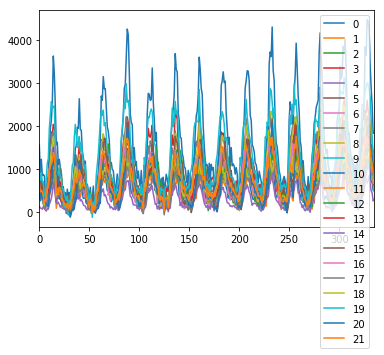

In [410]:
pd.DataFrame(pred['hvac']).T.plot()

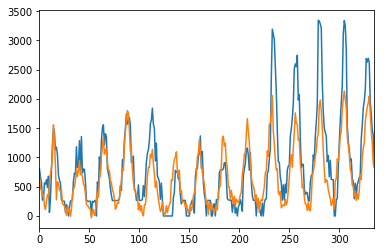

In [411]:
#pd.Series(test_all[21, 0, :]).plot()
appliance="hvac"
appliance_num = APPLIANCES_ORDER.index(appliance)
home = 2
pd.Series(test_all[home, appliance_num, :]).plot()


pd.Series(pred[appliance][home, :]).plot()

In [412]:
gt = tensor[valid_homes, :, 180:194, :][30:, :, :, :].reshape(22, 7, 336)

In [413]:
gt_agg = gt[:, 0, :].copy()

In [414]:
x[x>gt[:, 0, :]].size

0

In [415]:
err = {}
for appliance in APPLIANCES_ORDER[1:]:
    appliance_num = APPLIANCES_ORDER.index(appliance)
    x = pred[appliance]
    x[x<0.] = 0.
    x[x>gt[:, 0, :]] = gt[:, 0, :][x>gt[:, 0, :]]
    err[appliance] = np.abs(x-gt[:,appliance_num,:]).mean()
err

{'dw': 14.499282748441475,
 'fridge': 38.963289293411158,
 'hvac': 382.37234624226232,
 'mw': 6.0473137386404012,
 'oven': 18.841750304140575,
 'wm': 5.6176747577812591}

In [320]:
err = {}
for appliance in APPLIANCES_ORDER[1:]:
    appliance_num = APPLIANCES_ORDER.index(appliance)
    x = pred[appliance]
    x[x<0.] = 0.
    err[appliance] = np.abs(x-gt[:,appliance_num,:]).mean()
err

{'dw': 14.705560667027434,
 'fridge': 42.818390235146587,
 'hvac': 393.80620519751915,
 'mw': 6.2404866278266287,
 'oven': 19.633836841761177,
 'wm': 5.8684080275200738}

<tf.Tensor 'read:0' shape=(336, 336) dtype=float32>

In [66]:
pd.Series(err)

dw         24.501916
fridge     40.642623
hvac      407.645032
mw          9.477331
oven       24.559614
wm          9.269064
dtype: float64

In [44]:
err = {}
for appliance in APPLIANCES_ORDER[1:]:
    appliance_num = APPLIANCES_ORDER.index(appliance)
    x = pred[appliance]
    x[x<0.] = 0.
    err[appliance] = np.abs(x-gt[:,appliance_num,:]).mean()
err

{'dw': 24.870927145657255,
 'fridge': 40.642622669315109,
 'hvac': 407.64503194612212,
 'mw': 9.5177636509070478,
 'oven': 24.630917072655215,
 'wm': 9.4858786798710284}

In [46]:
pd.Series(err).mean()

86.13219019408797

In [50]:
(pd.DataFrame(pred['hvac'])-pd.DataFrame(gt[:,1,:])).abs().sum(axis=1)

0      76795.709343
1      90376.204248
2     107125.516512
3     154093.437996
4      75034.047701
5     112149.631845
6     161112.576504
7     126881.272907
8     125538.213085
9     189063.335770
10    215992.330513
11    205689.315586
12    214037.400083
13     88024.450001
14     88011.922891
15    162560.397587
16    102536.124285
17     76096.244452
18    194650.624890
19    126364.546612
20    210910.802409
21    110267.970926
dtype: float64

In [495]:
pd.DataFrame(err_sc).min(axis=1)

dw        98.465801
fridge    65.367590
hvac      76.061186
mw        69.195618
oven      59.718504
wm        50.857821
dtype: float64

In [51]:
def accuracy_pie_chart(ground_truth_appliance, prediction_appliance, gt_aggregate):
    out = 0.
    for i in range(6):
        out = out + min(np.sum(ground_truth_appliance[:, i, :]), np.sum(prediction_appliance[:, i, :]))
    return out/np.sum(gt_aggregate)    

In [55]:
approach_pred = {'Neural':pred}

pie_accuracies = {}
for approach_name, approach_prediction in approach_pred.items():
    pie_accuracies[approach_name] = accuracy_pie_chart(gt, approach_prediction, test_all[:, 0, :])

TypeError: unhashable type: 'slice'

Text(0,0.5,'Pie-chart energy breakdown \nproportion correctly identified\n(Higher is better)')

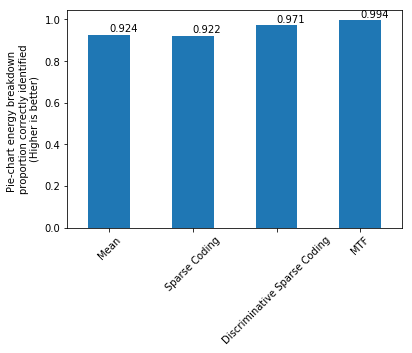

In [526]:
pie_accuracies = pd.Series(pie_accuracies).loc[['Mean','Sparse Coding','Discriminative Sparse Coding','MTF']]
ax = pie_accuracies.plot(kind='bar',rot=45)
for i, v in enumerate(pie_accuracies):
    ax.text( i,v+0.03, str(v.round(3)), va='center')
plt.ylabel("Pie-chart energy breakdown \nproportion correctly identified\n(Higher is better)")

In [522]:
pd.Series(pie_accuracies).

Discriminative Sparse Coding    0.971380
MTF                             0.994402
Mean                            0.923875
Sparse Coding                   0.921797
dtype: float64

In [487]:
mean_pred = np.zeros_like(pred_mtf)
mean_pred[:, :, :] = train_data.mean(axis=2)

In [488]:
mean_pred.shape

(22, 6, 336)

In [490]:
err_mean

{'dw': 101.42720929364509,
 'fridge': 76.717538971029512,
 'hvac': 78.719166409204803,
 'mw': 72.453527550654172,
 'oven': 65.686567624501521,
 'wm': 73.401499222720375}